# NLP Disaster Tweets Kaggle Mini-Project #

__Author__ : Jayjit Pradhan

__Project Description__ : This project is done as part of Introduction to Deep Learning course Week 4 assignment.

__Project Goal__ : In this project, I have build machine learning models with NLP that predicts which Tweets are about real disasters and which one’s aren’t with the provided dataset of 10,000 tweets that were hand classified.


__Natural Language Processing (NLP):__
NLP is a subfield of artificial intelligence that focuses on the interaction between computers and human language. It enables machines to read, understand, and derive meaning from human texts. In this project, we apply NLP to analyze tweets and predict whether they indicate a disaster event.

### Import Python Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional, Dropout, GlobalMaxPooling1D, SpatialDropout1D
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from collections import Counter
import itertools
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/jp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Load

Data have been downloaded from Natural Language Processing with Disaster Tweets Kaggle website (https://www.kaggle.com/competitions/nlp-getting-started/overview) to local and placed in nlp-getting-started directory.

In [2]:
os.listdir("./nlp-getting-started/")

['test.csv', 'train.csv', 'sample_submission.csv']

In [3]:
#Load traindf and testdf
train_df = pd.read_csv("./nlp-getting-started/train.csv")
test_df = pd.read_csv("./nlp-getting-started/test.csv")

## EDA

### Basic Information

In [4]:
print(f"\nTrain Dataset rows: {train_df.shape[0]}")
print(f"Train Dataset columns: {train_df.shape[1]}")
print(f"\nTest Dataset rows: {test_df.shape[0]}")
print(f"Test Dataset columns: {test_df.shape[1]}")
print("\nTrain Dataset info:")
print(train_df.info())
print("\nTest Dataset info:")
print(test_df.info())


Train Dataset rows: 7613
Train Dataset columns: 5

Test Dataset rows: 3263
Test Dataset columns: 4

Train Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None

Test Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


__Observations__:
- Train dataset have 7613 rows and 5 columns.
- Within the 5 columns in train dataset id and target columnns are of datatype int and rest fields keyword, location, text are String objects.
- Test dataset have 3263 rows and 4 columns. id is of datatype int & rest of the columns are String object.

### Missing or Null Value

In [5]:
print("Check for missing values in Train data:")
print(train_df.isnull().sum())
print("\nCheck for missing values in Test data:")
print(test_df.isnull().sum())

Check for missing values in Train data:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Check for missing values in Test data:
id             0
keyword       26
location    1105
text           0
dtype: int64


__Observations__:
- In the Train set there was 61 rows missing keyword value and 2533 rows missing location.
- In the Test set there was 26 rows missing keyword value and 1105 rows missing location.

### Data Summary

In [6]:
print("Basic statistics of Train data:")
print(train_df.describe(include='all'))

print("\nBasic statistics of Test data:")
print(test_df.describe(include='all'))

Basic statistics of Train data:
                  id     keyword location  \
count    7613.000000        7552     5080   
unique           NaN         221     3341   
top              NaN  fatalities      USA   
freq             NaN          45      104   
mean     5441.934848         NaN      NaN   
std      3137.116090         NaN      NaN   
min         1.000000         NaN      NaN   
25%      2734.000000         NaN      NaN   
50%      5408.000000         NaN      NaN   
75%      8146.000000         NaN      NaN   
max     10873.000000         NaN      NaN   

                                                     text      target  
count                                                7613  7613.00000  
unique                                               7503         NaN  
top     11-Year-Old Boy Charged With Manslaughter of T...         NaN  
freq                                                   10         NaN  
mean                                                  NaN     0.429

### Sample Data

In [7]:
# Sample data
print("Sample rows of Train data:")
print(train_df.head())

print("\nSample rows of Test data:")
print(test_df.head())

Sample rows of Train data:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Sample rows of Test data:
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soude

### Distribution of Target


Target distribution:
target
0    4342
1    3271
Name: count, dtype: int64
Percentage of disaster tweets: 42.97%


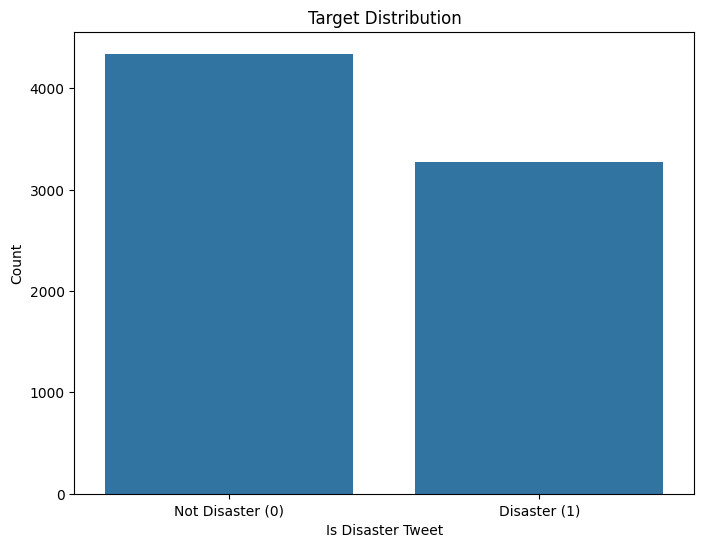

In [8]:
# Target distribution
target_counts = train_df['target'].value_counts()
print("\nTarget distribution:")
print(target_counts)
print(f"Percentage of disaster tweets: {target_counts[1] / len(train_df) * 100:.2f}%")

# Visualize target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=train_df)
plt.title('Target Distribution')
plt.xlabel('Is Disaster Tweet')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Disaster (0)', 'Disaster (1)'])
plt.show()

__Observations__:
- Training dataset have only 2 Target values 0 & 1.
- Value of '0' suggests not real disaster & value of 1 suggests disaster.
- Most of the tweets are not related to real disaster, only 42.97% tweets are real disaster tweets.

### Word Count by Target

Word Count statistics by target:
             mean  median  min  max       std
target                                       
0       14.704744    15.0    1   31  6.161564
1       15.167533    15.0    2   30  5.096806


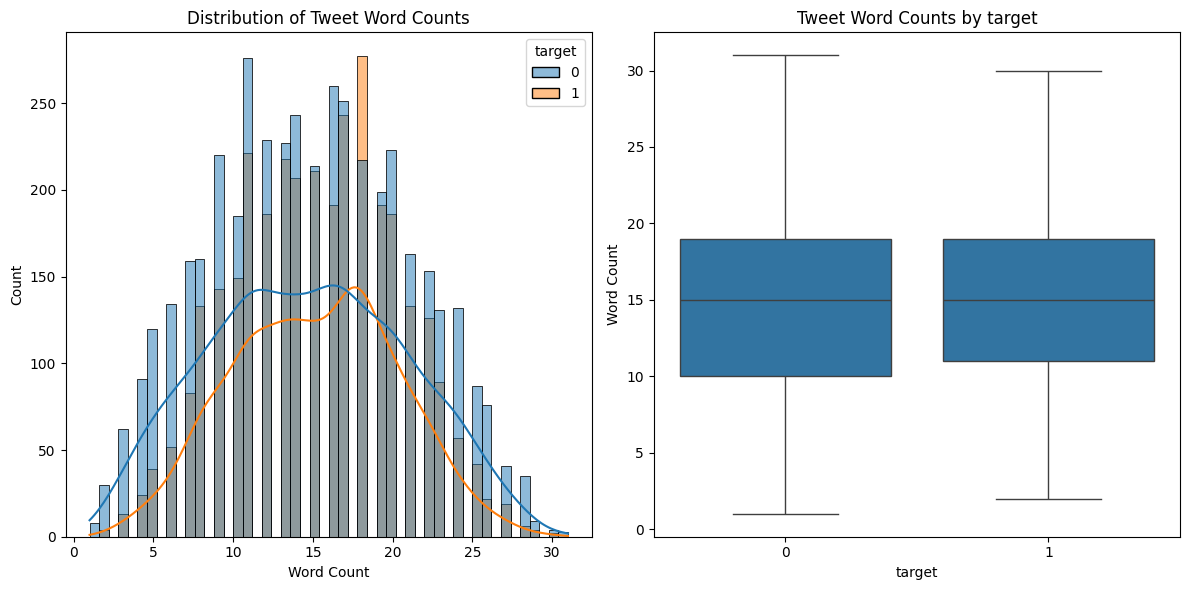

In [9]:
# Calculate statistics about word count by target
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
word_count_by_target = train_df.groupby('target')['word_count'].agg(['mean', 'median', 'min', 'max', 'std'])
print("Word Count statistics by target:")
print(word_count_by_target)

# Plot text length by target
plt.figure(figsize=(12, 6))
    
plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='word_count', hue='target', bins=50, kde=True)
plt.title('Distribution of Tweet Word Counts')
plt.xlabel('Word Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='word_count', data=train_df)
plt.title('Tweet Word Counts by target')
plt.xlabel('target')
plt.ylabel('Word Count')

plt.tight_layout()

__Observations__:
- Most of tweets have a word count between 10-20. 
- On average Disaster tweets have a smaller word cound that Non-disater ones.

### Text Length by Target

Text length statistics by target:
              mean  median  min  max        std
target                                         
0        95.706817   101.0    7  157  35.885924
1       108.113421   115.0   14  151  29.309854


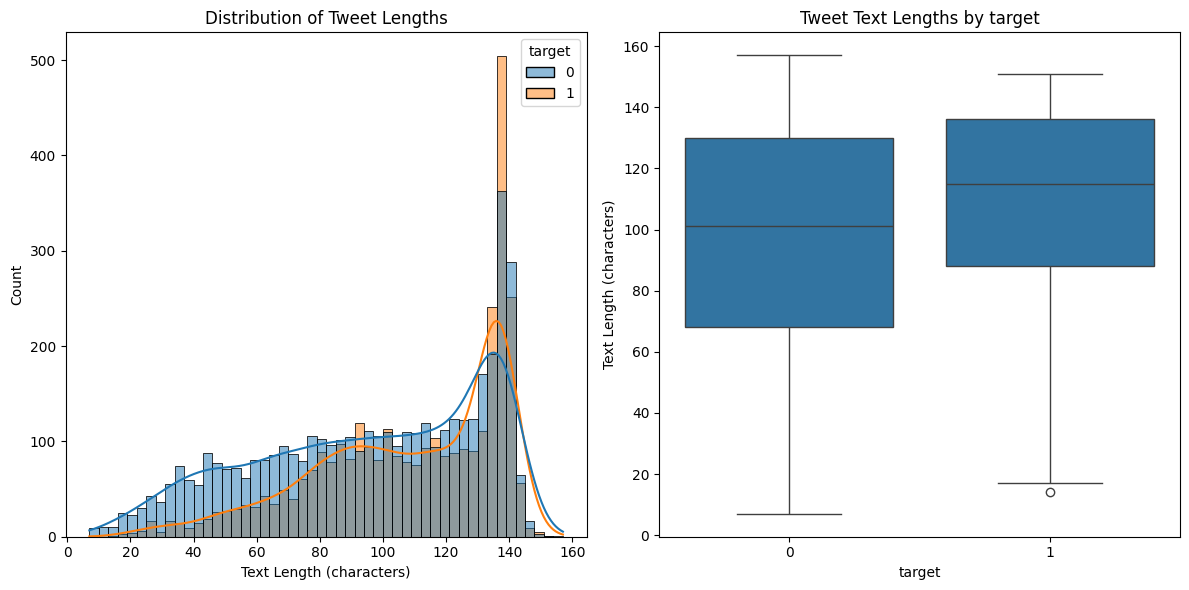

In [10]:
# Calculate statistics about text length by target
train_df['text_length'] = train_df['text'].apply(len)
text_length_by_target = train_df.groupby('target')['text_length'].agg(['mean', 'median', 'min', 'max', 'std'])
print("Text length statistics by target:")
print(text_length_by_target)

# Plot text length by target
plt.figure(figsize=(12, 6))
    
plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='text_length', hue='target', bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Text Length (characters)')

plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='text_length', data=train_df)
plt.title('Tweet Text Lengths by target')
plt.xlabel('target')
plt.ylabel('Text Length (characters)')

plt.tight_layout()

__Observations__:
- Most of atricles have a text length between 60-130. 
- On average Disaster tweets have a smaller text length that Non-disater ones.

### Cleaning and Prepossing Text

Since I am working with text data, performing special text preprocessing techniques before building model. 

The main goal is to preprocess and convert raw texts to tokens for model training. 

Lets prepare and clean texts by performing the following steps.

- Convert to lower case
- Remove punctuation
- Remove numbers, urls, mentions, hashtags, HTML tags
- Tokenize
- Remove stop words
- Lemmatize


In [11]:
#Clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens


train_df['processed_text'] = train_df['text'].apply(lambda x: ' '.join(preprocess_text(x)))
test_df['processed_text'] = test_df['text'].apply(lambda x: ' '.join(preprocess_text(x)))

# Sample of processed text
print("\nSample of processed text:")
for target in [0, 1]:
    print(f"\nTarget {target} examples:")
    print(train_df[train_df['target'] == target]['processed_text'].head(3).values)


Sample of processed text:

Target 0 examples:
['whats man' 'love fruit' 'summer lovely']

Target 1 examples:
['deed reason may allah forgive u' 'forest fire near la ronge sask canada'
 'resident asked shelter place notified officer evacuation shelter place order expected']


### Most Common Words

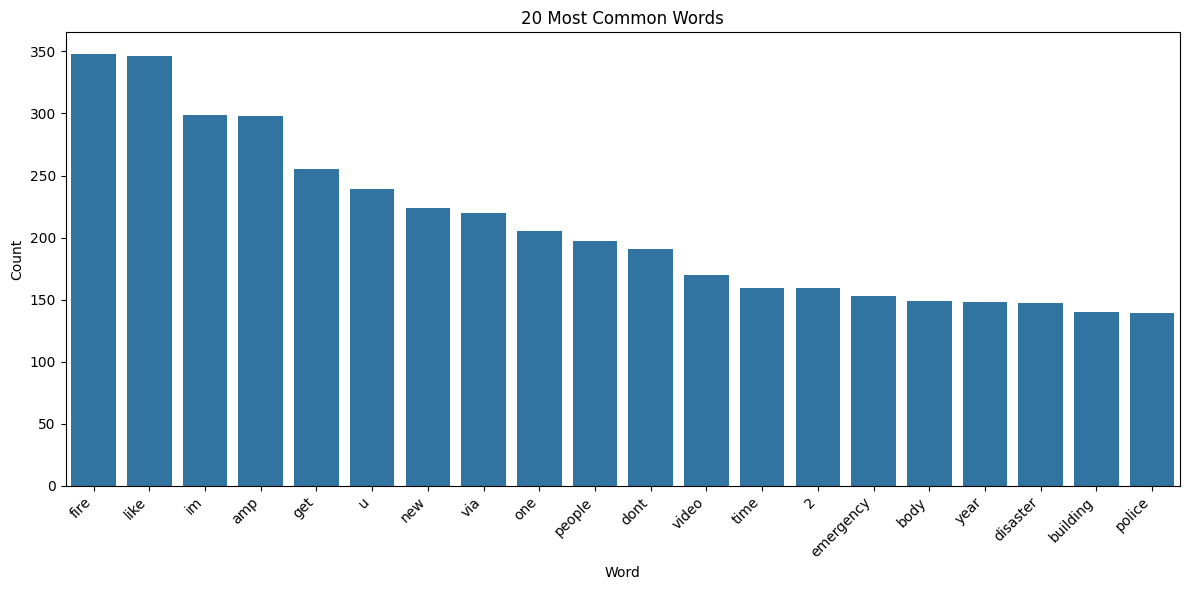

In [12]:
# Most common words overall
all_words = ' '.join(train_df['processed_text']).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

# Plot most common words
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


__Observations__:
- Looking at all the cleaned data in tweets, the most common is **fire & like**. Followed by **im,amp,get**.
- Also, I see some intertesting words as well like u, via, 2 etc.

### Word Frequencies by Target

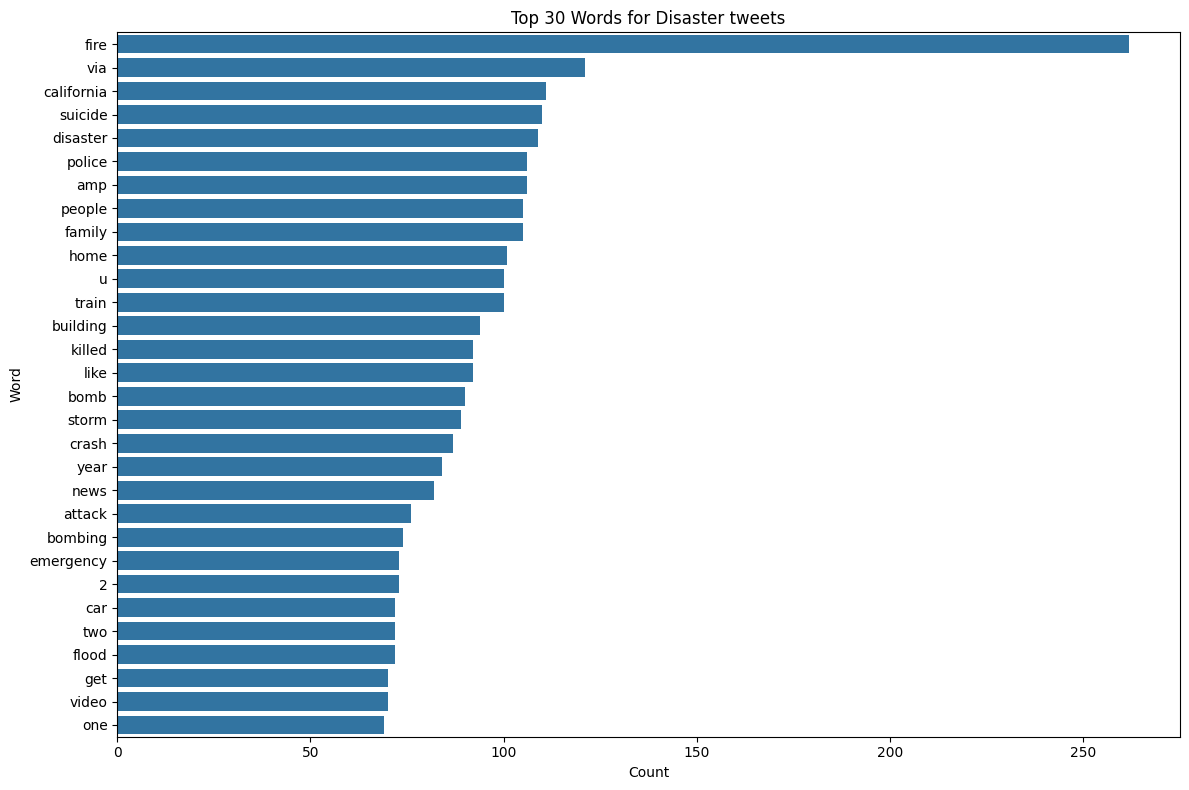

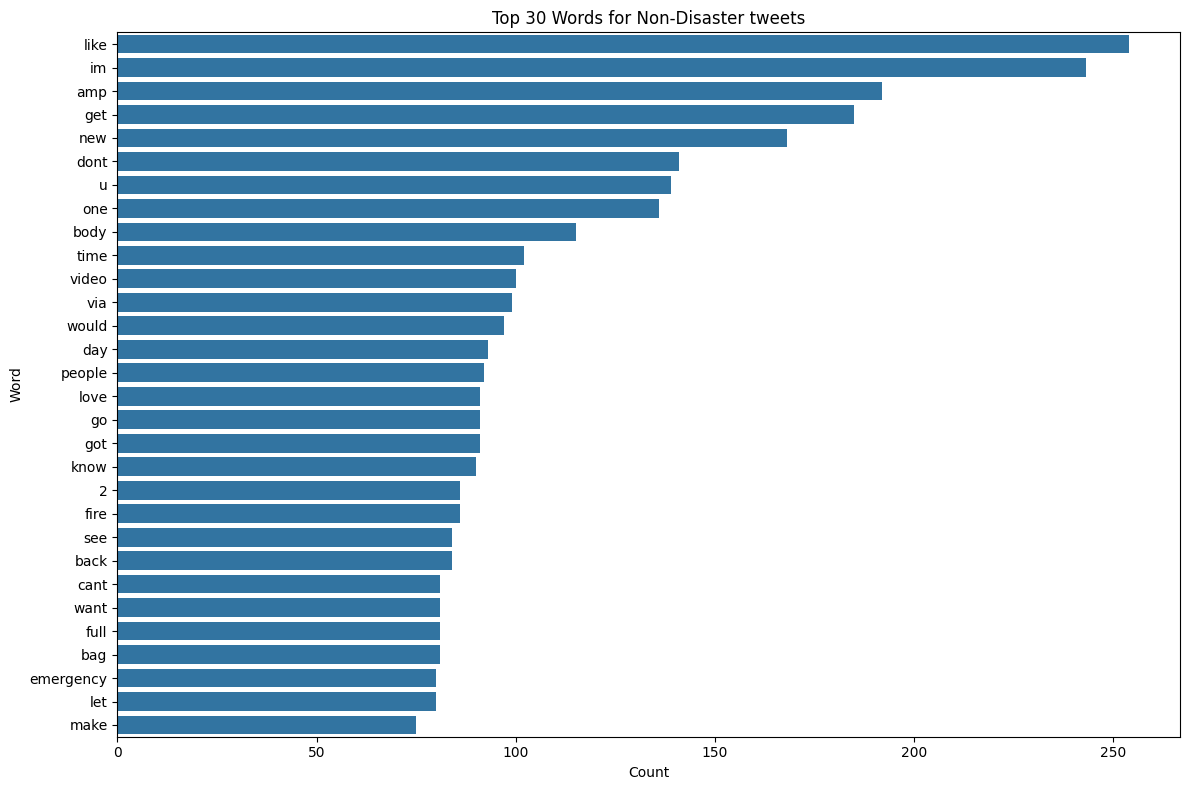

In [13]:
# Word frequencies by target
for target in train_df['target'].unique():
    target_text = ' '.join(train_df[train_df['target'] == target]['processed_text'])
    if len(target_text) > 0:
        target_words = target_text.split()
        target_word_counts = Counter(target_words)

        if len(target_word_counts) > 0:
            # Get top words for this target
            target_words, target_counts = zip(*target_word_counts.most_common(30))

            plt.figure(figsize=(12, 8))
            sns.barplot(x=list(target_counts), y=list(target_words))
            plt.title(f'Top 30 Words for {'Disaster' if target==1 else 'Non-Disaster'} tweets')
            plt.xlabel('Count')
            plt.ylabel('Word')
            plt.tight_layout()
            plt.show()

### Word Cloud by Target

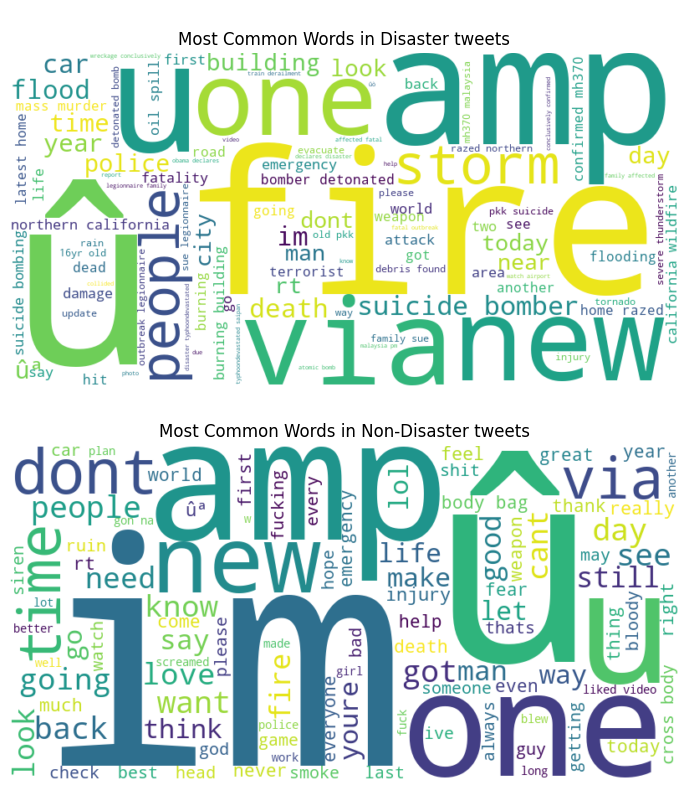

In [14]:
targets = train_df['target'].unique()

# Create a subplot for each category
fig, axes = plt.subplots(len(targets), 1, figsize=(12, 4*len(targets)))

for i, target in enumerate(targets):
    # Combine all text for this category
    text = ' '.join(train_df[train_df['target'] == target]['processed_text'])
    
    # Generate wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                         max_words=100, contour_width=3, contour_color='steelblue').generate(text)
    
    # Display wordcloud
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'\nMost Common Words in {'Disaster' if target==1 else 'Non-Disaster'} tweets')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### TF-IDF Analysis

In information retrieval, __TF-IDF__ (also TF*IDF, TFIDF, tf–idf, or Tf–idf), short for __term frequency–inverse document frequency__, is a measure of importance of a word to a document in a collection or corpus, adjusted for the fact that some words appear more frequently in general. Like the bag-of-words model, it models a document as a multiset of words, without word order. It is a refinement over the simple bag-of-words model, by allowing the weight of words to depend on the rest of the corpus.

It was often used as a weighting factor in searches of information retrieval, text mining, and user modeling. A survey conducted in 2015 showed that 83% of text-based recommender systems in digital libraries used tf–idf.[2] Variations of the tf–idf weighting scheme were often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf–idf for each query term; many more sophisticated ranking functions are variants of this simple model.

__Reference__: [Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

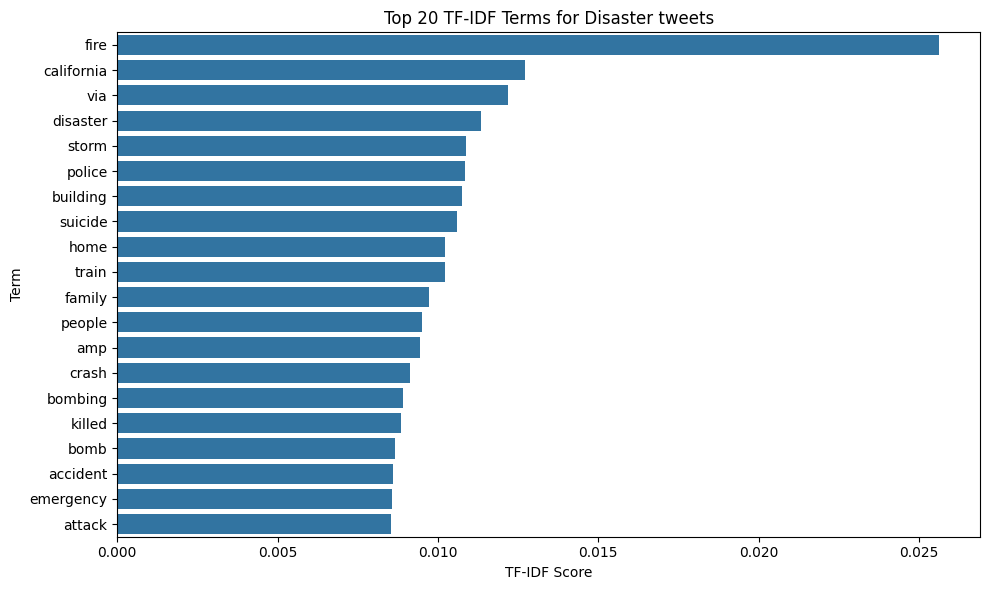

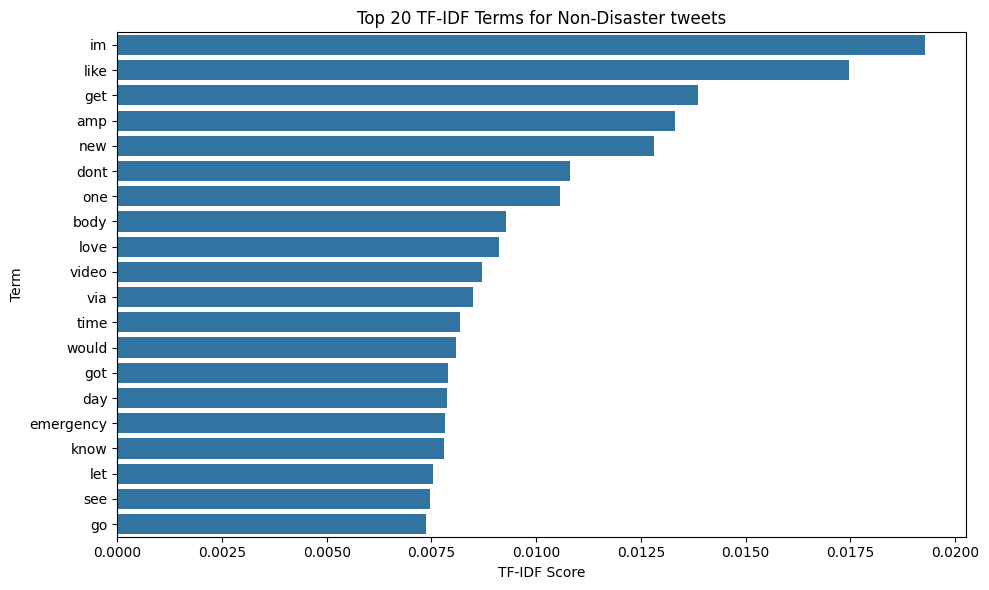

In [15]:
# TF-IDF analysis
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['processed_text'])

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get TF-IDF scores for each document
tfidf_scores = tfidf_matrix.toarray()

# Get top TF-IDF terms for each target
top_tfidf_by_target = {}
for target in train_df['target'].unique():
    target_indices = train_df[train_df['target'] == target].index
    target_tfidf = tfidf_scores[target_indices]

    # Calculate average TF-IDF score for this target
    avg_tfidf = np.mean(target_tfidf, axis=0)

    # Get indices of top terms
    top_indices = avg_tfidf.argsort()[-20:][::-1]
    top_terms = [(feature_names[idx], avg_tfidf[idx]) for idx in top_indices]

    top_tfidf_by_target[target] = top_terms
        
    # Create horizontal bar plot for top TF-IDF terms
    plt.figure(figsize=(10, 6))
    terms, scores = zip(*top_terms)
    sns.barplot(x=list(scores), y=list(terms))
    plt.title(f'Top 20 TF-IDF Terms for {'Disaster' if target==1 else 'Non-Disaster'} tweets')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Term')
    plt.tight_layout()
    plt.show()

### Data Preparation for Modelling

In [16]:
# Prepare data for modeling
MAX_WORDS = 10000  # Maximum number of words to keep
MAX_LENGTH = 50    # Maximum sequence length

# Tokenize the text
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['processed_text'])

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(train_df['processed_text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['processed_text'])

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

# Get target
y_train = train_df['target'].values
y_train_pad = train_df['target'].values

# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_pad, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (6090, 50)
Validation data shape: (1523, 50)


__Observations:__
- After splitting the train set has 6090 rows and validation set has 1523 rows.

## Baseline GRU Model Build

In [17]:
# Baseline GRU Model Build

base_gru_model = Sequential([
        Embedding(input_dim=MAX_WORDS, output_dim=100, input_length=MAX_LENGTH),
        SpatialDropout1D(0.2),
        
        GRU(128, return_sequences=True, recurrent_dropout=0.2),
        GlobalMaxPooling1D(),
        
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
base_gru_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Baseline GRU Model Summary:")
base_gru_model.summary()

Baseline GRU Model Summary:


2025-05-16 23:40:10.307411: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-05-16 23:40:10.307441: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-05-16 23:40:10.307444: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-05-16 23:40:10.307463: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-16 23:40:10.307471: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Training Base GRU Model

In [18]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_gru_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train base model
history_base_gru = base_gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10


2025-05-16 23:40:10.741445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5788 - loss: 0.6706
Epoch 1: val_loss improved from inf to 0.44117, saving model to best_gru_model.h5


96/96 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.5794 - loss: 0.6701 - val_accuracy: 0.8063 - val_loss: 0.4412
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8441 - loss: 0.3774
Epoch 2: val_loss improved from 0.44117 to 0.43763, saving model to best_gru_model.h5


96/96 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.8440 - loss: 0.3775 - val_accuracy: 0.8017 - val_loss: 0.4376
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9049 - loss: 0.2588
Epoch 3: val_loss did not improve from 0.43763
96/96 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.9049 - loss: 0.2588 - val_accuracy: 0.7984 - val_loss: 0.4956
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9323 - loss: 0.1802
Epoch 4: val_loss did not improve from 0.43763
96/96 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.9322 - loss: 0.1803 - val_accuracy: 0.7919 - val_loss: 0.5709
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9509 - loss: 0.1360
Epoch 5: val_loss did not improve from 0.43763
96/96 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.9508 - loss: 0.1361 - val_accuracy: 0.7787 - val_loss: 0.6956
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


__Observations:__
- Base GRU model was trained with train set with training accuracy of 0.8440 and validation accuracy of 0.8017.
- Corresponding training loss: 0.3775 and validation loss is 0.4376.

### Visualizing Training History

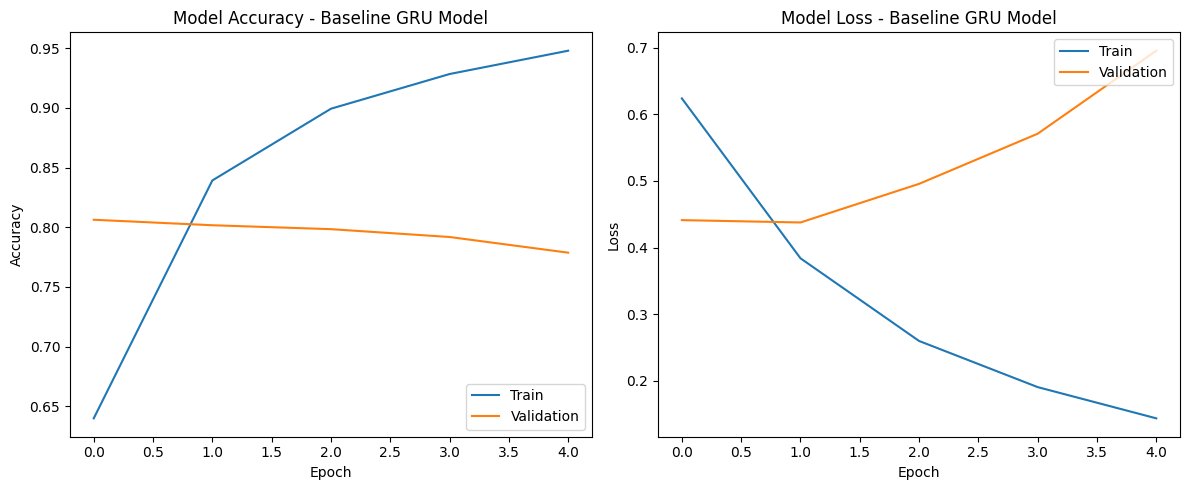

In [19]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_base_gru.history['accuracy'])
plt.plot(history_base_gru.history['val_accuracy'])
plt.title('Model Accuracy - Baseline GRU Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history_base_gru.history['loss'])
plt.plot(history_base_gru.history['val_loss'])
plt.title('Model Loss - Baseline GRU Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

### Base GRU Classification Report

In [20]:
# Evaluate base model
y_pred_base_gru = (base_gru_model.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_pred_base_gru))

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       869
           1       0.81      0.71      0.75       654

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



### Base GRU Model Metrics

In [21]:
base_accuracy_gru = accuracy_score(y_val, y_pred_base_gru)
base_precision_gru, base_recall_gru, base_f1_gru, _ = precision_recall_fscore_support(y_val, y_pred_base_gru, average='binary')

print(f"Base GRU Model Accuracy: {base_accuracy_gru:.4f}")
print(f"Base GRU Model Precision: {base_precision_gru:.4f}")
print(f"Base GRU Model Recall: {base_recall_gru:.4f}")
print(f"Base GRU Model F1 Score: {base_f1_gru:.4f}")

Base GRU Model Accuracy: 0.8017
Base GRU Model Precision: 0.8077
Base GRU Model Recall: 0.7064
Base GRU Model F1 Score: 0.7537


__Observations__:
- Without any hyperparameter tuning, with clean and processed text the BASE GRU model is able to get a accuracy of 80.17%

### Confusion Matrix

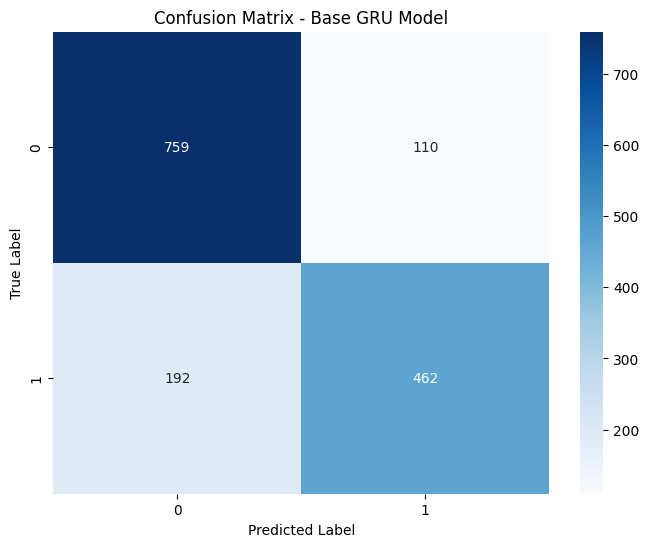

In [22]:
# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred_base_gru)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Base GRU Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

__Observations__:
- Confusion Matrix shows, the Base GRU Model was good at identifying Non-Disaster tweets better than Disaster ones.

### Model Solution on Test Data

In [23]:
# Make predictions on the test set
base_model = load_model('best_gru_model.h5')
test_predictions = base_model.predict(X_test_pad)
test_predictions_binary = (test_predictions > 0.5).astype(int).flatten()

submission_df = pd.read_csv('./nlp-getting-started/sample_submission.csv')

# Create submission file
submission_df['target'] = test_predictions_binary
submission_df.to_csv('base_gru_submission.csv', index=False)

print("Submission file created: base_gru_submission.csv")

102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step
Submission file created: base_gru_submission.csv


## Baseline LSTM Model Build

In [24]:
# Baseline LSTM Model Build
base_lstm_model = Sequential([
        Embedding(input_dim=MAX_WORDS, output_dim=100, input_length=MAX_LENGTH),
        SpatialDropout1D(0.2),
        
        LSTM(128, return_sequences=True, recurrent_dropout=0.2),
        GlobalMaxPooling1D(),
        
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
base_lstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Baseline LSTM Model Summary:")
base_lstm_model.summary()

Baseline LSTM Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Training Base LSTM Model

In [25]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_lstm_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train base model
history_base_lstm = base_lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5830 - loss: 0.6783
Epoch 1: val_loss improved from inf to 0.49049, saving model to best_lstm_model.h5


96/96 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.5833 - loss: 0.6780 - val_accuracy: 0.7978 - val_loss: 0.4905
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8387 - loss: 0.4154
Epoch 2: val_loss improved from 0.49049 to 0.46149, saving model to best_lstm_model.h5


96/96 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.8387 - loss: 0.4154 - val_accuracy: 0.7899 - val_loss: 0.4615
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8955 - loss: 0.2804
Epoch 3: val_loss did not improve from 0.46149
96/96 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.8955 - loss: 0.2804 - val_accuracy: 0.7971 - val_loss: 0.4692
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9293 - loss: 0.1990
Epoch 4: val_loss did not improve from 0.46149
96/96 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.9292 - loss: 0.1991 - val_accuracy: 0.7708 - val_loss: 0.5925
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9473 - loss: 0.1538
Epoch 5: val_loss did not improve from 0.46149
96/96 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.9473 - loss: 0.1538 - val_accuracy: 0.7728 - val_loss: 0.7215
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


__Observations:__
- Base LSTM model was trained with train set with training accuracy of 0.8387 and validation accuracy of 0.7899.
- Corresponding training loss is 0.4154 and validation loss is 0.4615.

### Visualizing Training History

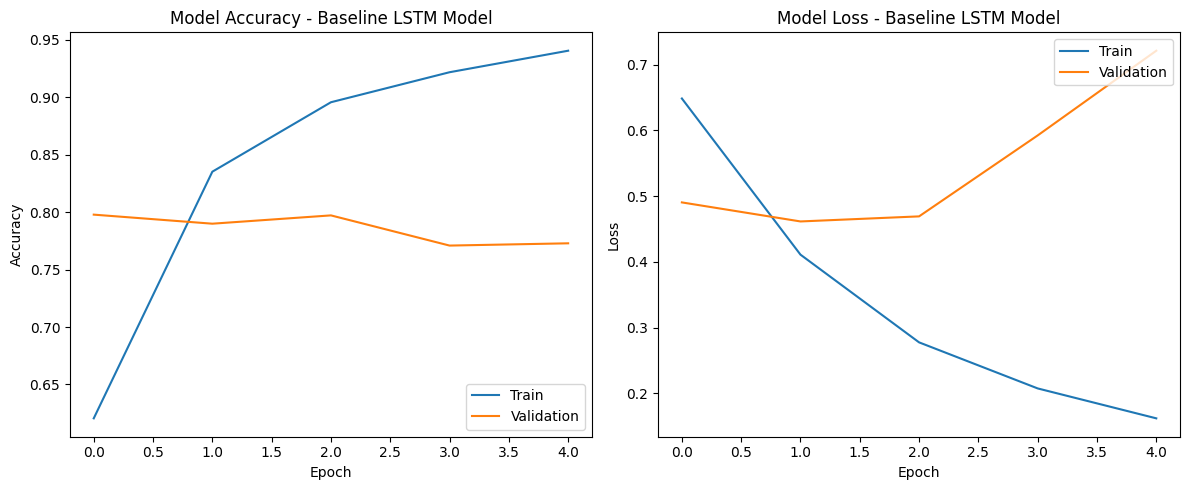

In [26]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_base_lstm.history['accuracy'])
plt.plot(history_base_lstm.history['val_accuracy'])
plt.title('Model Accuracy - Baseline LSTM Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history_base_lstm.history['loss'])
plt.plot(history_base_lstm.history['val_loss'])
plt.title('Model Loss - Baseline LSTM Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

### Base LSTM Classification Report

In [27]:
# Evaluate base model
y_pred_base_lstm = (base_lstm_model.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_pred_base_lstm))

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       869
           1       0.77      0.73      0.75       654

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



### Base LSTM Model Metrics

In [28]:
base_accuracy_lstm = accuracy_score(y_val, y_pred_base_lstm)
base_precision_lstm, base_recall_lstm, base_f1_lstm, _ = precision_recall_fscore_support(y_val, y_pred_base_lstm, average='binary')

print(f"Base LSTM Model Accuracy: {base_accuracy_lstm:.4f}")
print(f"Base LSTM Model Precision: {base_precision_lstm:.4f}")
print(f"Base LSTM Model Recall: {base_recall_lstm:.4f}")
print(f"Base LSTM Model F1 Score: {base_f1_lstm:.4f}")

Base LSTM Model Accuracy: 0.7899
Base LSTM Model Precision: 0.7685
Base LSTM Model Recall: 0.7309
Base LSTM Model F1 Score: 0.7492


__Observations__:
- Without any hyperparameter tuning, with clean and processed text the BASE LSTM model is able to get a accuracy of 78.99%

### Confusion Matrix

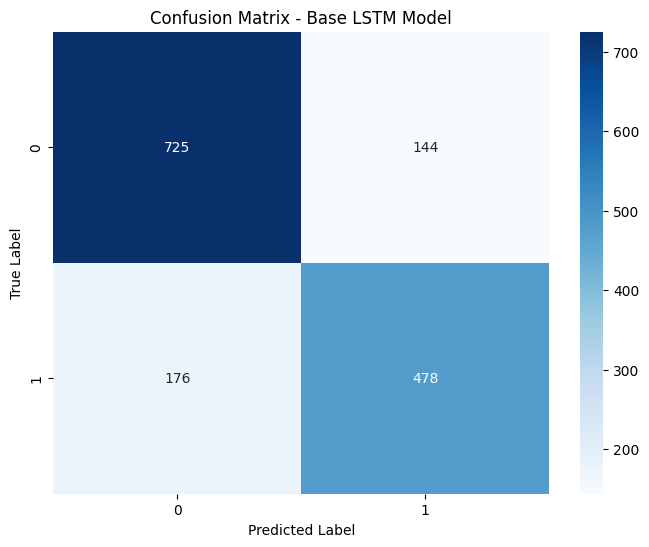

In [44]:
# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred_base_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Base LSTM Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

__Observations__:
- Confusion Matrix shows, the Base GRU Model was good at identifying Non-Disaster tweets better than Disaster ones.

### Model Solution on Test Data

In [30]:
# Make predictions on the test set
base_model = load_model('best_lstm_model.h5')
test_predictions = base_model.predict(X_test_pad)
test_predictions_binary = (test_predictions > 0.5).astype(int).flatten()

submission_df = pd.read_csv('./nlp-getting-started/sample_submission.csv')

# Create submission file
submission_df['target'] = test_predictions_binary
submission_df.to_csv('base_lstm_submission.csv', index=False)

print("Submission file created: base_lstm_submission.csv")

102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step
Submission file created: base_lstm_submission.csv


## Model Hyperparameter Tuning

### Hyperparameter Tuning Architectures

I have selected below architectures to compare the model performances and pick best performing model--

- Base GRU
- Base LSTM
- Bidirectional GRU
- Bidirectional LSTM
- Large GRU
- Large LSTM
- Small GRU with Low Dropout
- Small LSTM with Low Dropout

F1_score is used to compare model performances and pick best model.

In [31]:
# Different architectures to try
models_to_try = [
    {
        'name': 'Bidirectional GRU',
        'type': 'GRU',
        'params': {
            'embedding_dim': 100,
            'gru_units': 128,
            'bidirectional': True,
            'spatial_dropout': 0.3,
            'recurrent_dropout': 0.2,
            'dense_dropout': 0.5
        }
    },
    {
        'name': 'Large GRU',
        'type': 'GRU',
        'params': {
            'embedding_dim': 200,
            'gru_units': 256,
            'bidirectional': False,
            'spatial_dropout': 0.2,
            'recurrent_dropout': 0.3,
            'dense_dropout': 0.4
        }
    },
    {
        'name': 'Bidirectional LSTM',
        'type': 'LSTM',
        'params': {
            'embedding_dim': 100,
            'lstm_units': 128,
            'bidirectional': True,
            'spatial_dropout': 0.3,
            'recurrent_dropout': 0.2,
            'dense_dropout': 0.5
        }
    },
    {
        'name': 'Large LSTM',
        'type': 'LSTM',
        'params': {
            'embedding_dim': 200,
            'lstm_units': 256,
            'bidirectional': False,
            'spatial_dropout': 0.2,
            'recurrent_dropout': 0.3,
            'dense_dropout': 0.4
        }
    },
    {
        'name': 'Small GRU with Low Dropout',
        'type': 'GRU',
        'params': {
            'embedding_dim': 50,
            'gru_units': 64,
            'bidirectional': False,
            'spatial_dropout': 0.1,
            'recurrent_dropout': 0.1,
            'dense_dropout': 0.2
        }
    },
    {
        'name': 'Small LSTM with Low Dropout',
        'type': 'LSTM',
        'params': {
            'embedding_dim': 50,
            'lstm_units': 64,
            'bidirectional': False,
            'spatial_dropout': 0.1,
            'recurrent_dropout': 0.1,
            'dense_dropout': 0.2
        }
    }
]


### Training and Evaluation of Models

In [32]:
# Train and evaluate different models
results = []
histories = {}

for model_config in models_to_try:
    print(f"\nTraining {model_config['name']}...")
    # Create and train model
    if model_config['params']['bidirectional']:
        if model_config['type']=='GRU':
            model = Sequential([
                Embedding(input_dim=MAX_WORDS, output_dim=model_config['params']['embedding_dim'], input_length=MAX_LENGTH),
                SpatialDropout1D(model_config['params']['spatial_dropout']),
                
                Bidirectional(GRU(model_config['params']['gru_units'], return_sequences=True, recurrent_dropout=model_config['params']['recurrent_dropout'])),
                GlobalMaxPooling1D(),
                
                Dense(64, activation='relu'),
                Dropout(model_config['params']['dense_dropout']),
                Dense(1, activation='sigmoid')
            ])
        else:
            model = Sequential([
                Embedding(input_dim=MAX_WORDS, output_dim=model_config['params']['embedding_dim'], input_length=MAX_LENGTH),
                SpatialDropout1D(model_config['params']['spatial_dropout']),
                
                Bidirectional(LSTM(model_config['params']['lstm_units'], return_sequences=True, recurrent_dropout=model_config['params']['recurrent_dropout'])),
                GlobalMaxPooling1D(),
                
                Dense(64, activation='relu'),
                Dropout(model_config['params']['dense_dropout']),
                Dense(1, activation='sigmoid')
            ])
    else:
        if model_config['type']=='GRU':
            model = Sequential([
                Embedding(input_dim=MAX_WORDS, output_dim=model_config['params']['embedding_dim'], input_length=MAX_LENGTH),
                SpatialDropout1D(model_config['params']['spatial_dropout']),
                GRU(model_config['params']['gru_units'], return_sequences=True, recurrent_dropout=model_config['params']['recurrent_dropout']),
                GlobalMaxPooling1D(),
                
                Dense(64, activation='relu'),
                Dropout(model_config['params']['dense_dropout']),
                Dense(1, activation='sigmoid')
            ])
        else:
            model = Sequential([
                Embedding(input_dim=MAX_WORDS, output_dim=model_config['params']['embedding_dim'], input_length=MAX_LENGTH),
                SpatialDropout1D(model_config['params']['spatial_dropout']),
                LSTM(model_config['params']['lstm_units'], return_sequences=True, recurrent_dropout=model_config['params']['recurrent_dropout']),
                GlobalMaxPooling1D(),
                
                Dense(64, activation='relu'),
                Dropout(model_config['params']['dense_dropout']),
                Dense(1, activation='sigmoid')
            ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        batch_size=64,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
        ]
    )
    
    # Evaluate model
    y_pred = (model.predict(X_val) > 0.5).astype(int)
    accuracy = accuracy_score(y_val, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='binary')
    
    # Save results
    results.append({
        'Model': model_config['name'],
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    histories[model_config['name']] = history
    
    print(f"{model_config['name']} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")



Training Bidirectional GRU...
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 439s 5s/step - accuracy: 0.5742 - loss: 0.6743 - val_accuracy: 0.7886 - val_loss: 0.4572
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 436s 5s/step - accuracy: 0.8252 - loss: 0.4077 - val_accuracy: 0.7991 - val_loss: 0.4465
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 436s 5s/step - accuracy: 0.8924 - loss: 0.2732 - val_accuracy: 0.7748 - val_loss: 0.5432
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 436s 5s/step - accuracy: 0.9308 - loss: 0.1926 - val_accuracy: 0.7919 - val_loss: 0.6017
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 437s 5s/step - accuracy: 0.9455 - loss: 0.1530 - val_accuracy: 0.7774 - val_loss: 0.6692
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step
Bidirectional GRU - Accuracy: 0.7991, F1 Score: 0.7524

Training Large GRU...
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.6011 - loss: 0.6574 - val_accuracy: 0.8017 - val_loss: 0.4490
Epoc

### Visualizing Training Histories

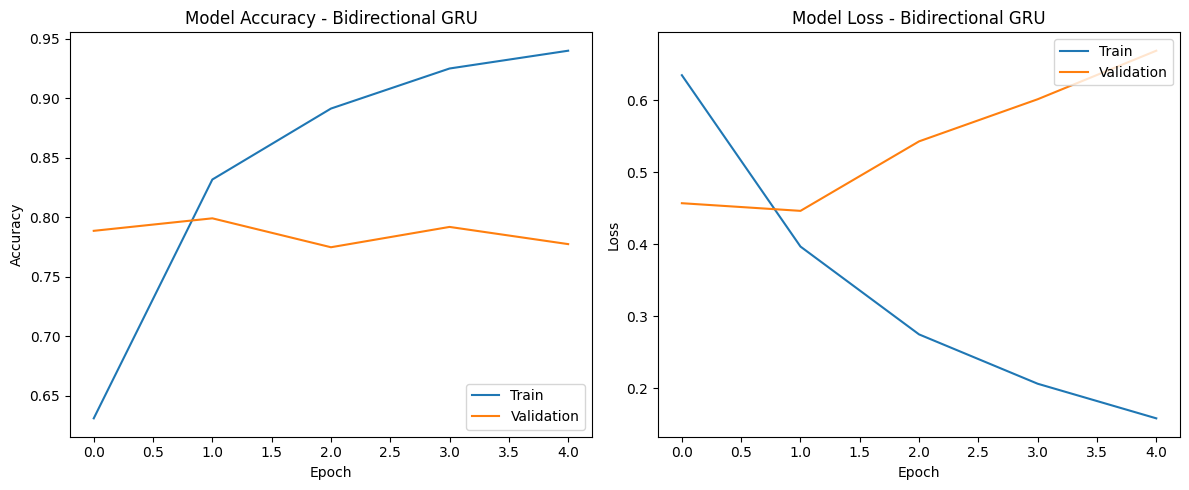

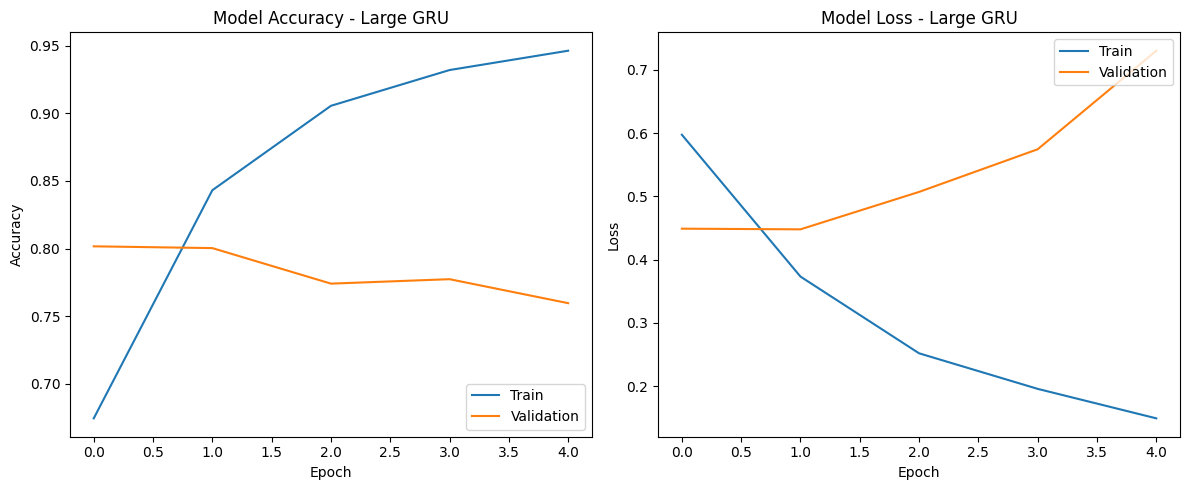

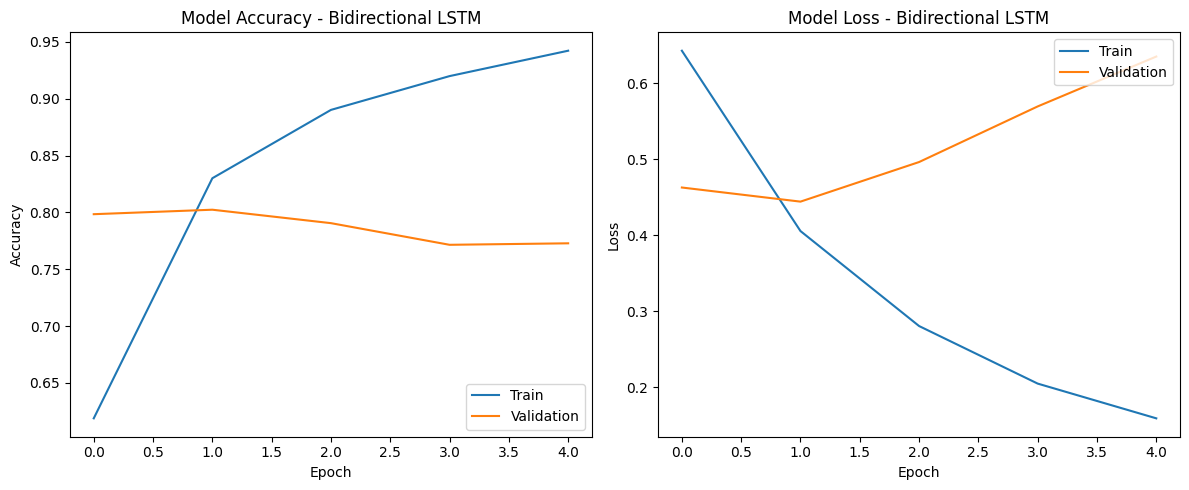

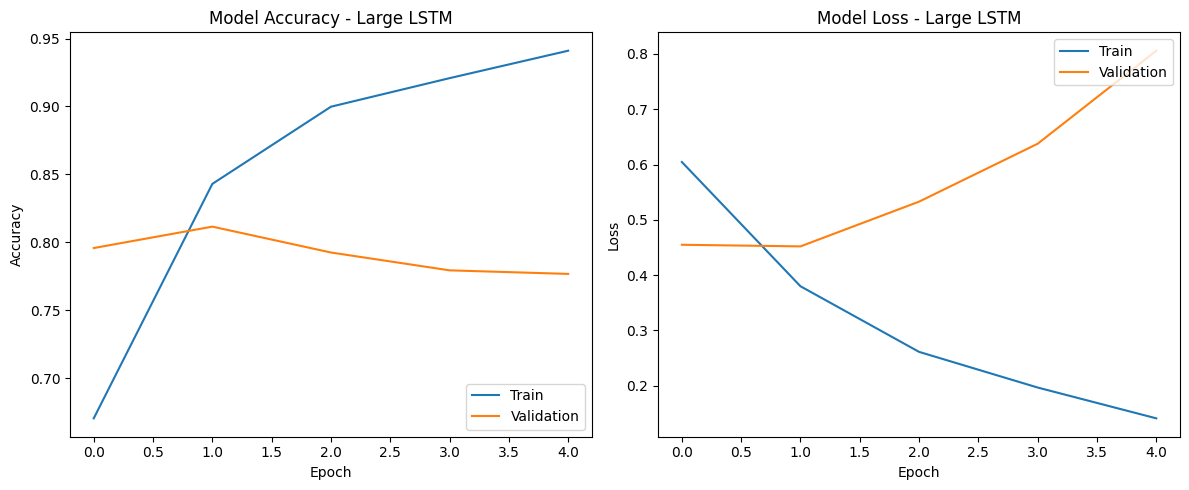

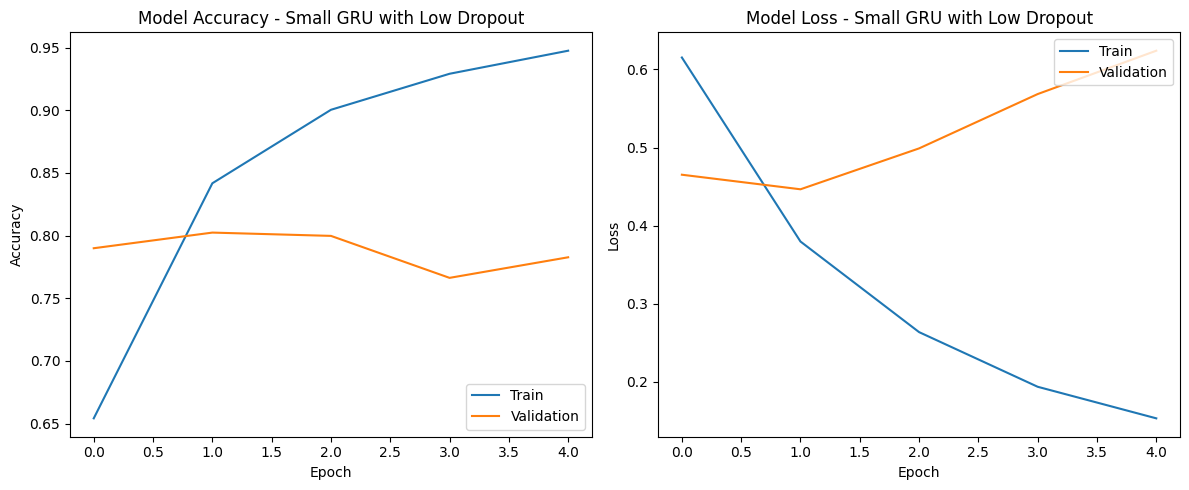

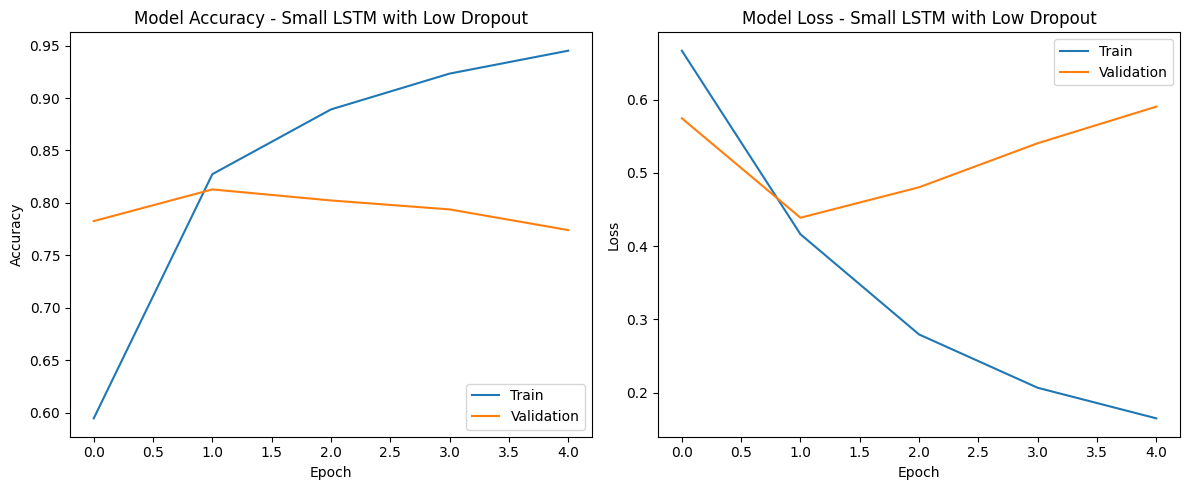

In [33]:
for model, hist in histories.items():
    # Plot training history
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title(f'Model Accuracy - {model}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')
    
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title(f'Model Loss - {model}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    plt.show()


### Hyperparameter Model Comparison

In [34]:
# Add base model results
results.append({
    'Model': 'Base GRU',
    'Accuracy': base_accuracy_gru,
    'Precision': base_precision_gru,
    'Recall': base_recall_gru,
    'F1 Score': base_f1_gru
})

results.append({
    'Model': 'Base LSTM',
    'Accuracy': base_accuracy_lstm,
    'Precision': base_precision_lstm,
    'Recall': base_recall_lstm,
    'F1 Score': base_f1_lstm
})

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
results_df


Model Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
0,Bidirectional GRU,0.799081,0.798969,0.711009,0.752427
1,Large GRU,0.800394,0.818182,0.688073,0.747508
2,Bidirectional LSTM,0.802364,0.850895,0.654434,0.739844
3,Large LSTM,0.811556,0.842991,0.689602,0.758621
4,Small GRU with Low Dropout,0.802364,0.831144,0.677370,0.746420
5,Small LSTM with Low Dropout,0.812869,0.854127,0.680428,0.757447
6,Base GRU,0.801707,0.807692,0.706422,0.753670
7,Base LSTM,0.789888,0.768489,0.730887,0.749216


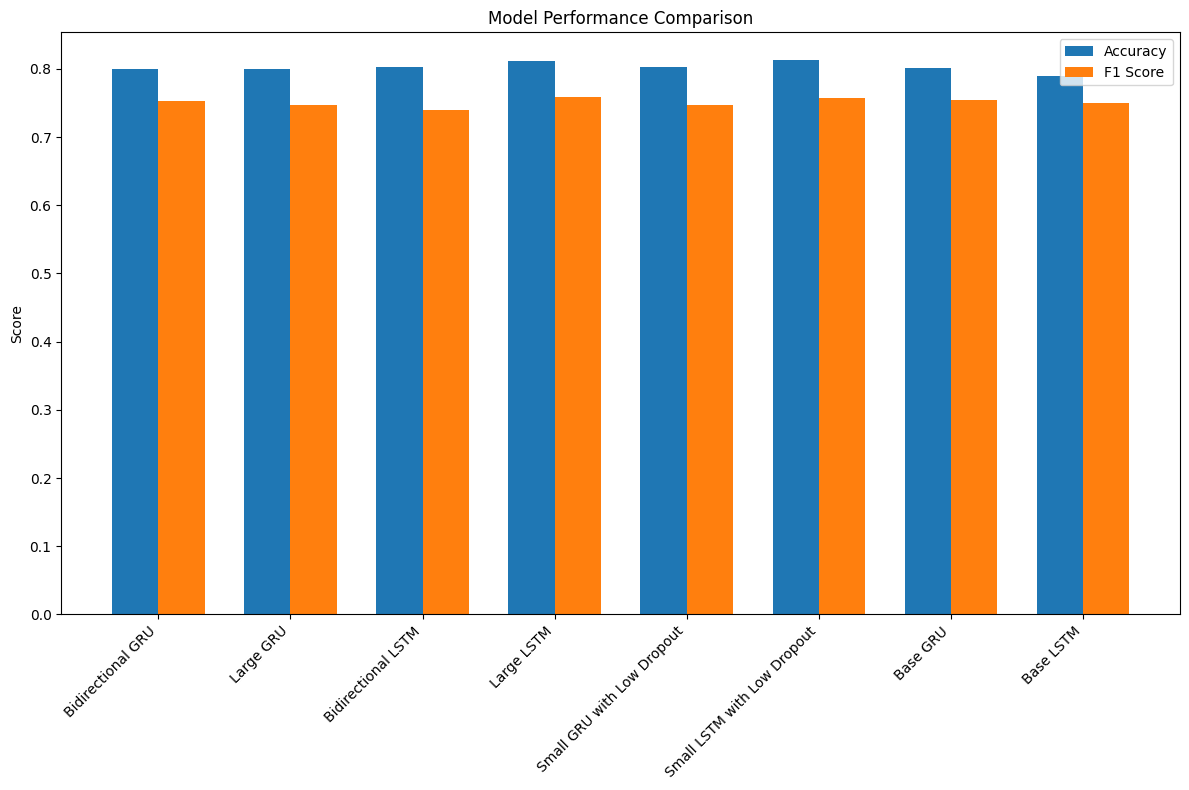

In [35]:
# Visualize model comparison
plt.figure(figsize=(12, 8))

models = results_df['Model']
accuracy = results_df['Accuracy']
f1_scores = results_df['F1 Score']

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, accuracy, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='F1 Score')

plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
# Find best model
best_model_idx = results_df['F1 Score'].argmax()
best_model_name = results_df.iloc[best_model_idx]['Model']
print(f"Best model based on F1 Score: {best_model_name}")

Best model based on F1 Score: Large LSTM


__Observations__:
- After hyperparameter tuning the best model is Large LSTM with 256 units.

### Training Best Model with Full Train Set

In [37]:
# Train final model with best configuration
if best_model_name == 'Base GRU':
    best_model_config = {
        'embedding_dim': 100,
        'gru_units': 128,
        'bidirectional': False,
        'spatial_dropout': 0.2,
        'recurrent_dropout': 0.2,
        'dense_dropout': 0.5
    }
elif best_model_name == 'Base LSTM':
    best_model_config = {
        'embedding_dim': 100,
        'lstm_units': 128,
        'bidirectional': False,
        'spatial_dropout': 0.2,
        'recurrent_dropout': 0.2,
        'dense_dropout': 0.5
    }
else:
    best_model_config = next(m['params'] for m in models_to_try if m['name'] == best_model_name)

print(f"\nTraining final model with {best_model_name} configuration...")

if best_model_config['bidirectional']:
    if 'GRU' in best_model_name:
        final_model = Sequential([
            Embedding(input_dim=MAX_WORDS, output_dim=best_model_config['embedding_dim'], input_length=MAX_LENGTH),
            SpatialDropout1D(best_model_config['spatial_dropout']),
            
            Bidirectional(GRU(best_model_config['gru_units'], return_sequences=True, recurrent_dropout=best_model_config['recurrent_dropout'])),
            GlobalMaxPooling1D(),
            
            Dense(64, activation='relu'),
            Dropout(best_model_config['dense_dropout']),
            Dense(1, activation='sigmoid')
        ])
    else:
        final_model = Sequential([
            Embedding(input_dim=MAX_WORDS, output_dim=best_model_config['embedding_dim'], input_length=MAX_LENGTH),
            SpatialDropout1D(best_model_config['spatial_dropout']),
            
            Bidirectional(LSTM(best_model_config['lstm_units'], return_sequences=True, recurrent_dropout=best_model_config['recurrent_dropout'])),
            GlobalMaxPooling1D(),
            
            Dense(64, activation='relu'),
            Dropout(best_model_config['dense_dropout']),
            Dense(1, activation='sigmoid')
        ])
else:
    if 'GRU' in best_model_name:
        final_model = Sequential([
            Embedding(input_dim=MAX_WORDS, output_dim=best_model_config['embedding_dim'], input_length=MAX_LENGTH),
            SpatialDropout1D(best_model_config['spatial_dropout']),
            
            GRU(best_model_config['gru_units'], return_sequences=True, recurrent_dropout=best_model_config['recurrent_dropout']),
            GlobalMaxPooling1D(),
            
            Dense(64, activation='relu'),
            Dropout(best_model_config['dense_dropout']),
            Dense(1, activation='sigmoid')
        ])
    else:
        final_model = Sequential([
            Embedding(input_dim=MAX_WORDS, output_dim=best_model_config['embedding_dim'], input_length=MAX_LENGTH),
            SpatialDropout1D(best_model_config['spatial_dropout']),
            
            LSTM(best_model_config['lstm_units'], return_sequences=True, recurrent_dropout=best_model_config['recurrent_dropout']),
            GlobalMaxPooling1D(),
            
            Dense(64, activation='relu'),
            Dropout(best_model_config['dense_dropout']),
            Dense(1, activation='sigmoid')
        ])

final_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(f" Final Model - {best_model_name} Summary:")
final_model.summary()

final_history = final_model.fit(
    X_train_pad, y_train_pad,  
    validation_split=0.1,
    epochs=15,
    batch_size=64,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
        ModelCheckpoint('final_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
    ]
)


Training final model with Large LSTM configuration...
 Final Model - Large LSTM Summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_8             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_8          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6027 - loss: 0.6555
Epoch 1: val_loss improved from inf to 0.46368, saving model to final_model.h5


108/108 ━━━━━━━━━━━━━━━━━━━━ 295s 3s/step - accuracy: 0.6033 - loss: 0.6549 - val_accuracy: 0.7887 - val_loss: 0.4637
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8556 - loss: 0.3553
Epoch 2: val_loss did not improve from 0.46368
108/108 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.8556 - loss: 0.3553 - val_accuracy: 0.7782 - val_loss: 0.4732
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9106 - loss: 0.2437
Epoch 3: val_loss did not improve from 0.46368
108/108 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.9106 - loss: 0.2437 - val_accuracy: 0.7782 - val_loss: 0.5254
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9351 - loss: 0.1735
Epoch 4: val_loss did not improve from 0.46368
108/108 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.9351 - loss: 0.1736 - val_accuracy: 0.7480 - val_loss: 0.6249
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9551 - loss: 0.1233
Epoch 5: val_loss did not improve from 0.46368


### Visualizing Training History

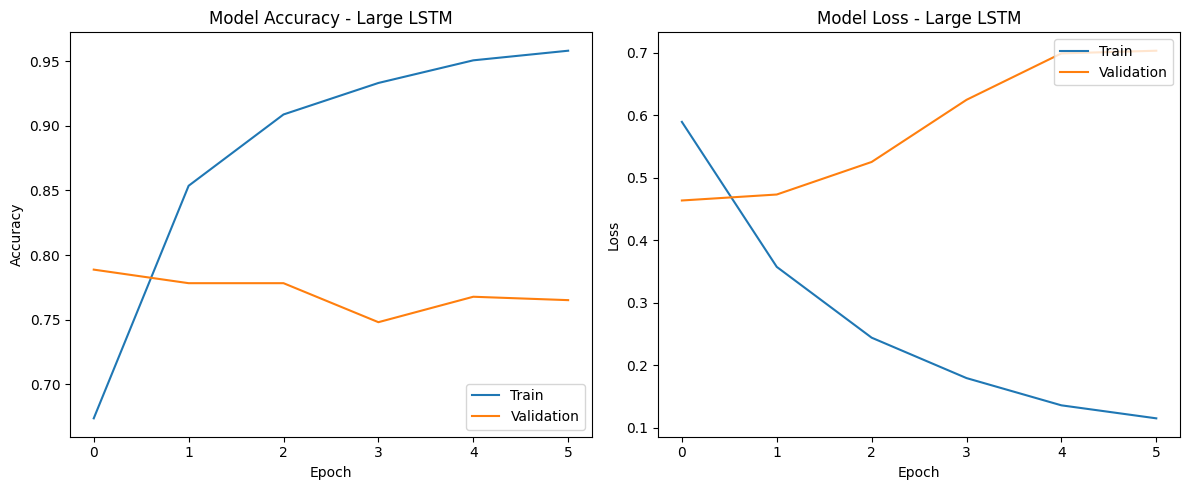

In [38]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title(f'Model Accuracy - {best_model_name}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(final_history.history['loss'])
plt.plot(final_history.history['val_loss'])
plt.title(f'Model Loss - {best_model_name}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

### Final Model Classification Report

In [39]:
# Evaluate final model
y_pred = (final_model.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_pred))

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step
              precision    recall  f1-score   support

           0       0.82      0.96      0.89       869
           1       0.94      0.72      0.81       654

    accuracy                           0.86      1523
   macro avg       0.88      0.84      0.85      1523
weighted avg       0.87      0.86      0.86      1523



__Observations__:
- With clean and processed text, the hyperparameter tuned NMF model model is able to get a accuracy of 95.37%

### Final Model Metrics

In [40]:
final_accuracy = accuracy_score(y_val, y_pred)
final_precision, final_recall, final_f1, _ = precision_recall_fscore_support(y_val, y_pred, average='binary')

print(f"{best_model_name} Accuracy: {final_accuracy:.4f}")
print(f"{best_model_name} Precision: {final_precision:.4f}")
print(f"{best_model_name} Recall: {final_recall:.4f}")
print(f"{best_model_name} Model F1 Score: {final_f1:.4f}")

Large LSTM Accuracy: 0.8588
Large LSTM Precision: 0.9381
Large LSTM Recall: 0.7187
Large LSTM Model F1 Score: 0.8139


__Observations:__
- Large LSTM model was able to provide a validation accuracy of 85.88% with a F1 score as 0.8139.

### Confusion Matrix

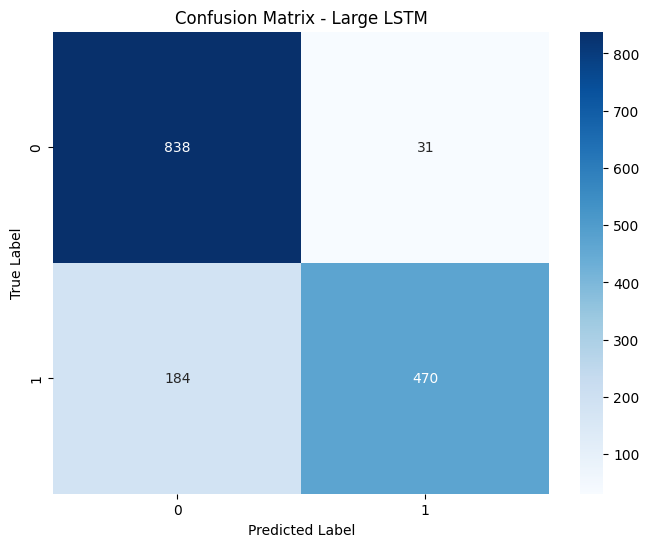

In [41]:
# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

__Observations__:
- Confusion Matrix shows, the tuned LSTM model is able classify non-disaster tweets most sucessfully.
- Disaster tweet idenfication also got improved.


### Model Solution on Test Data

In [43]:
# Make predictions on the test set
base_model = load_model('final_model.h5')
test_predictions = final_model.predict(X_test_pad)
test_predictions_binary = (test_predictions > 0.5).astype(int).flatten()

submission_df = pd.read_csv('./nlp-getting-started/sample_submission.csv')

# Create submission file
submission_df['target'] = test_predictions_binary
submission_df.to_csv('final_submission.csv', index=False)

print("Submission file created: final_submission.csv")

102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step
Submission file created: final_submission.csv


## Conclusion

- During my experiment with different models, Large LSTM was able to provide the best performance.
- Test submission with final model provides as accuracy score of ~78%.